In [1]:
import pandas as pd 
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series      # To work on series 
import seaborn as sns
%matplotlib inline 
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows',None)

In [2]:
month_count=pd.read_csv(r'E:\user\snappfood qualiftying\source\data\edited data\month_count_purchase.csv')

In [3]:
data=pd.read_csv(r'E:\user\snappfood qualiftying\source\data\edited data\df1.csv')

In [4]:
data=data.set_index('created_at')

In [5]:
data.index=pd.to_datetime(data.index)

In [6]:
data=data.sort_index()

In [7]:
data.shape

(29057, 9)

In [8]:
data.head()

,order_id,user_id,discount_cost,discount_type,basket,month,day,year,cohort
created_at,,,,,,,,,
2021-04-12,1,1,10000,1.0,12000,4,12,2021,3
2021-05-09,2,2,0,0.0,20000,5,9,2021,5
2021-05-09,3,3,10000,1.0,14000,5,9,2021,3
2021-11-10,4,4,0,0.0,15000,11,10,2021,11
2021-11-10,5,5,10000,1.0,16000,11,10,2021,1


In [52]:
new_cus=pd.DataFrame(columns=['user_id','order_id','discount_cost','discount_type','basket','day','month','year'],dtype=np.float64)

In [57]:
unique_id=data['user_id'].value_counts().index

In [58]:
len(unique_id)

9985

In [59]:
order=[]
discount_cost=[]
discount_type=[]
basket=[]
day=[]
month=[]
year=[]
for i in range(9985):
    user=unique_id[i]

    order.append(data[data['user_id']==user].sort_values(['year','month','day']).iloc[0]['order_id'])
    discount_cost.append(data[data['user_id']==user].sort_values(['year','month','day']).iloc[0]['discount_cost'])
    discount_type.append(data[data['user_id']==user].sort_values(['year','month','day']).iloc[0]['discount_type'])
    basket.append(data[data['user_id']==user].sort_values(['year','month','day']).iloc[0]['basket'])
    day.append(data[data['user_id']==user].sort_values(['year','month','day']).iloc[0]['day'])
    month.append(data[data['user_id']==user].sort_values(['year','month','day']).iloc[0]['month'])
    year.append(data[data['user_id']==user].sort_values(['year','month','day']).iloc[0]['year'])

In [85]:
index=[]
for i in range(9985):
    user=unique_id[i]
    index.append(data[data['user_id']==user].sort_values(['year','month','day'])['order_id'].index[0])

In [87]:
new_cus['index']=index

In [90]:
new_cus.head()

,user_id,order_id,discount_cost,discount_type,basket,day,month,year
index,,,,,,,,
2022-02-08,1984,2775.0,0.0,0.0,28000.0,8.0,2.0,2022.0
2022-03-06,3276,5498.0,0.0,0.0,32400.0,6.0,3.0,2022.0
2022-04-03,4360,8250.0,0.0,0.0,14000.0,3.0,4.0,2022.0
2022-01-17,806,951.0,0.0,0.0,12000.0,17.0,1.0,2022.0
2022-01-11,500,551.0,0.0,0.0,6500.0,11.0,1.0,2022.0


In [89]:
new_cus=new_cus.set_index('index')

In [71]:
new_cus.isnull().sum()

user_id          0
order_id         0
discount_cost    0
discount_type    0
basket           0
day              0
month            0
year             0
dtype: int64

In [91]:
new_cus.to_csv(r'E:\user\snappfood qualification\source\data\edited data\new_cus.csv',index=False)

<AxesSubplot:xlabel='basket', ylabel='Density'>

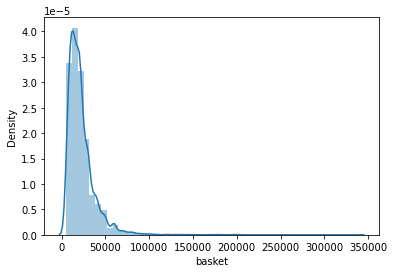

In [75]:
sns.distplot(new_cus['basket'])

In [11]:
new_cus=pd.read_csv(r'E:\user\snappfood qualification\source\data\edited data\new_cus.csv')

<AxesSubplot:xlabel='year,month'>

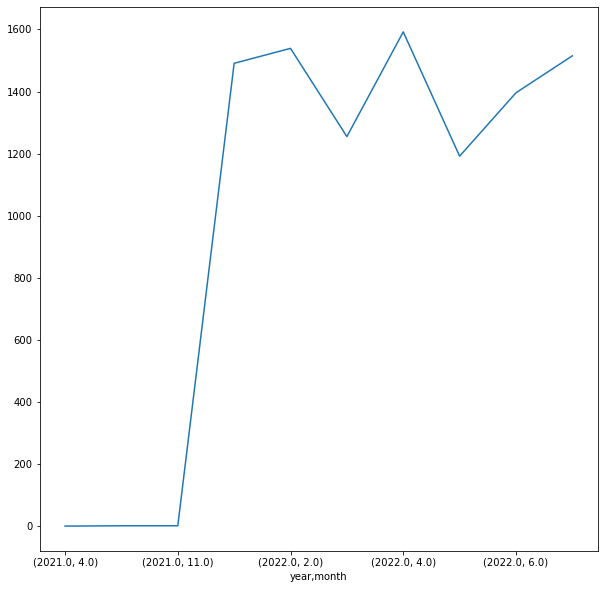

In [154]:
plt.figure(figsize=(10,10))
new_cus.groupby(['year','month'])['user_id'].count().plot()

In [142]:
month_index=['2021-04-01','2021-05-01','2021-11-01','2022-01-01','2022-02-01','2022-03-01','2022-04-01','2022-05-01',
             '2022-06-01','2022-07-01']
month_purchase=pd.DataFrame(index=month_index,columns=['median_basket'])

In [144]:
month_purchase.index=pd.to_datetime(month_purchase.index)

In [155]:
month_purchase['median_basket']=new_cus.groupby(['year','month'])['user_id'].count().values

In [158]:
month_purchase.to_csv(r'E:\user\snappfood qualiftying\source\data\edited data\month_count_purchase.csv',index=False)

## modeling

Auto Regressive Integrated Moving Average (ARIMA)

In [21]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(month_count, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(month_count), len(month_count), typ='levels')
print('the prediction for the number of purchases in July based on ARIMA is {}'.format(int(yhat.values)))

the prediction for the number of purchases in July based on ARIMA is 1484


Seasonal Auto Regressive Integrated Moving Average SARIMA

In [17]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit model
model = SARIMAX(month_count, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(month_count), len(month_count))
print('the prediction for the number of purchases in July based on SARIMA is {}'.format(int(yhat.values)))

the prediction for the number of purchases in July based on SARIMA is 1484
